**Objetivos**

Este capítulo abordará:
1. A biblioteca embutida `datetime` de Python. 
2. Conversão de strings em uma data.
3. Formatação de datas.
4. Extração dos componentes de datas.
5. Cálculos com datas.
6. Como trabalhar com datas em um `DataFrame`.
7. Reamostragem.
8. Como trabalhar com fusos horários.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2022, 8, 23, 22, 58, 7, 87238)

In [4]:
t2 = datetime.now()
t1 = datetime(1991, 3, 15)
t1

datetime.datetime(1991, 3, 15, 0, 0)

In [5]:
t2 - t1

datetime.timedelta(days=11484, seconds=66832, microseconds=72101)

In [6]:
type(t2 - t1)

datetime.timedelta

In [8]:
# conversão para datetime
ebola = pd.read_csv("country_timeseries.csv")
ebola

# canto superior esquerdo dos dados
ebola.iloc[:5, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0


In [9]:
ebola.info() # mostra que Date está codificada como object (string)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [12]:
ebola["date_dt"] = pd.to_datetime(ebola["Date"], format = "%m/%d/%Y")
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [14]:
# carregando dados que incluam datas
ebola = pd.read_csv("country_timeseries.csv", parse_dates = [0])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [15]:
# extraindo componentes de datas
d = pd.to_datetime("2016-02-29")
d

Timestamp('2016-02-29 00:00:00')

In [16]:
type(d)

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
d.year

2016

In [18]:
d.day

29

In [19]:
ebola["date_dt"] = pd.to_datetime(ebola["Date"])
ebola[["Date", "date_dt"]].head()

,Date,date_dt
0,2015-01-05,2015-01-05
1,2015-01-04,2015-01-04
2,2015-01-03,2015-01-03
3,2015-01-02,2015-01-02
4,2014-12-31,2014-12-31


In [21]:
ebola["year"] = ebola["date_dt"].dt.year
ebola[["Date", "date_dt", "year"]].head()

,Date,date_dt,year
0,2015-01-05,2015-01-05,2015
1,2015-01-04,2015-01-04,2015
2,2015-01-03,2015-01-03,2015
3,2015-01-02,2015-01-02,2015
4,2014-12-31,2014-12-31,2014


In [22]:
ebola["month"], ebola["day"] = (ebola["date_dt"].dt.month,
                                ebola["date_dt"].dt.day)
ebola[["Date", "date_dt", "year", "month", "day"]].head()

,Date,date_dt,year,month,day
0,2015-01-05,2015-01-05,2015,1,5
1,2015-01-04,2015-01-04,2015,1,4
2,2015-01-03,2015-01-03,2015,1,3
3,2015-01-02,2015-01-02,2015,1,2
4,2014-12-31,2014-12-31,2014,12,31


In [23]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [24]:
ebola["date_dt"].min()

Timestamp('2014-03-22 00:00:00')

In [25]:
ebola["outbreak_d"] = ebola["date_dt"] - ebola["date_dt"].min()
ebola[["Date", "Day", "outbreak_d"]].head()

,Date,Day,outbreak_d
0,2015-01-05,289,289 days
1,2015-01-04,288,288 days
2,2015-01-03,287,287 days
3,2015-01-02,286,286 days
4,2014-12-31,284,284 days


In [26]:
ebola[["Date", "Day", "outbreak_d"]].tail()

,Date,Day,outbreak_d
117,2014-03-27,5,5 days
118,2014-03-26,4,4 days
119,2014-03-25,3,3 days
120,2014-03-24,2,2 days
121,2014-03-22,0,0 days


In [27]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 122 non-null    datetime64[ns] 
 1   Day                  122 non-null    int64          
 2   Cases_Guinea         93 non-null     float64        
 3   Cases_Liberia        83 non-null     float64        
 4   Cases_SierraLeone    87 non-null     float64        
 5   Cases_Nigeria        38 non-null     float64        
 6   Cases_Senegal        25 non-null     float64        
 7   Cases_UnitedStates   18 non-null     float64        
 8   Cases_Spain          16 non-null     float64        
 9   Cases_Mali           12 non-null     float64        
 10  Deaths_Guinea        92 non-null     float64        
 11  Deaths_Liberia       81 non-null     float64        
 12  Deaths_SierraLeone   87 non-null     float64        
 13  Deaths_Nigeria      

In [28]:
# métodos de datetime
banks = pd.read_csv("banklist.csv")
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


In [29]:
banks = pd.read_csv("banklist.csv", parse_dates = [5, 6])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB


In [30]:
banks["closing_quarter"], banks["closing_year"] = (banks["Closing Date"].dt.quarter,
                                                  banks["Closing Date"].dt.year)

closing_year = banks.groupby(["closing_year"]).size()

In [31]:
closing_year_q = banks.groupby(["closing_year", "closing_quarter"]).size()

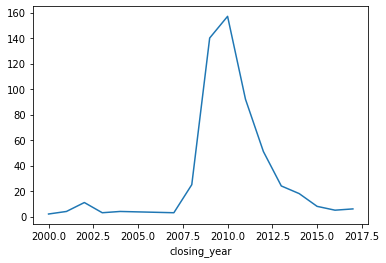

In [33]:
fig, ax = plt.subplots()

ax = closing_year.plot()
plt.show()

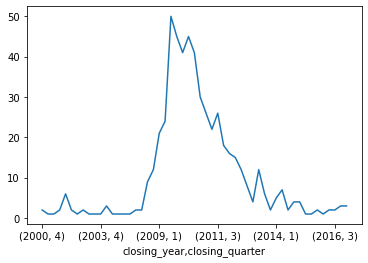

In [34]:
fig, ax = plt.subplots()
ax = closing_year_q.plot()
plt.show()

In [36]:
# intervalos de datas
ebola = pd.read_csv("country_timeseries.csv", parse_dates = [0])
ebola.iloc[:5, :5] # 2015-01-01 não está presente em Date

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [37]:
ebola.iloc[-5:, :5] # 2014-03-23 não está presente em Date

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


In [38]:
# criar um intervalo de datas para reindexar um conjunto de dados com reindex
head_range = pd.date_range(start = "2013-12-31", end = "2015-01-05")
head_range

DatetimeIndex(['2013-12-31', '2014-01-01', '2014-01-02', '2014-01-03',
               '2014-01-04', '2014-01-05', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=371, freq='D')

In [39]:
ebola_5 = ebola.head()
ebola_5.index = ebola_5["Date"]
ebola_5

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [40]:
ebola_5.reindex(head_range)
ebola_5.iloc[:5, :5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0
2015-01-02,2015-01-02,286,NaN,8157.0,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0


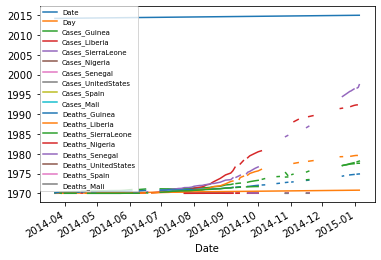

In [42]:
ebola.index = ebola["Date"]

fig, ax = plt.subplots()
ax = ebola.plot(ax = ax)
ax.legend(fontsize = 7,
         loc = 2,
         borderaxespad = 0)
plt.show()

In [43]:
ebola_sub = ebola[["Day", "Cases_Guinea", "Cases_Liberia"]]
ebola_sub.tail(10)

,Day,Cases_Guinea,Cases_Liberia
Date,,,
2014-04-04,13,143.0,18.0
2014-04-01,10,127.0,8.0
2014-03-31,9,122.0,8.0
2014-03-29,7,112.0,7.0
2014-03-28,6,112.0,3.0
2014-03-27,5,103.0,8.0
2014-03-26,4,86.0,NaN
2014-03-25,3,86.0,NaN
2014-03-24,2,86.0,NaN


In [53]:
# datas entre diferntes locais não batem!
# vamos deslocar valores de modo a realinhar datas em relação a uma data 0 (a mais antiga do banco)
ebola = pd.read_csv("country_timeseries.csv",
                    index_col = "Date",
                   parse_dates = ["Date"])

ebola.head().iloc[:, :4]

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,
2015-01-05,289,2776.0,NaN,10030.0
2015-01-04,288,2775.0,NaN,9780.0
2015-01-03,287,2769.0,8166.0,9722.0
2015-01-02,286,NaN,8157.0,NaN
2014-12-31,284,2730.0,8115.0,9633.0


In [45]:
ebola.tail().iloc[:, :4]

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,
2014-03-27,5,103.0,8.0,6.0
2014-03-26,4,86.0,NaN,NaN
2014-03-25,3,86.0,NaN,NaN
2014-03-24,2,86.0,NaN,NaN
2014-03-22,0,49.0,NaN,NaN


In [54]:
# cria novo intervalo de datas
new_idx = pd.date_range(ebola.index.min(), ebola.index.max())
new_idx

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')

In [56]:
np.flip(new_idx)

# reindexando dados
ebola = ebola.reindex(new_idx)
ebola.head().iloc[:, :4]

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
2014-03-22,0.0,49.0,NaN,NaN
2014-03-23,NaN,NaN,NaN,NaN
2014-03-24,2.0,86.0,NaN,NaN
2014-03-25,3.0,86.0,NaN,NaN
2014-03-26,4.0,86.0,NaN,NaN


In [63]:
first_valid = ebola.apply(pd.Series.first_valid_index)
first_valid

Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]

In [59]:
earliest_date = ebola.index.min()
earliest_date

Timestamp('2014-03-22 00:00:00', freq='D')

In [65]:
shift_values = first_valid - earliest_date
shift_values

Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]

In [69]:
ebola_dict = {}

for idx, col in enumerate(ebola):
    d = shift_values[idx].days
    shifted = ebola[col].shift(d)
    ebola_dict[col] = shifted
    
# convertendo dicionário em dataframe
ebola_shift = pd.DataFrame(ebola_dict)

# reordenando os dados
ebola_shift = ebola_shift[ebola.columns]

ebola_shift.head()

,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
2014-03-22,0.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-25,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-26,4.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
